In [1]:
import plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import datetime


In [2]:
#데이터 불러오기
customers_ = pd.read_csv("/content/olist_customers_dataset.csv")
order_items_ = pd.read_csv("/content/olist_order_items_dataset.csv")
order_payments_ = pd.read_csv("/content/olist_order_payments_dataset.csv")
orders_ = pd.read_csv("/content/olist_orders_dataset.csv")

df1 = order_payments_.merge(order_items_, on = 'order_id')
df2 = df1.merge(orders_, on = 'order_id')
df = df2.merge(customers_, on = 'customer_id')

In [ ]:
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,...,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,...,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,...,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,...,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,18570,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,...,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,...,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,...,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP
117599,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,...,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ


In [3]:
#Recency 도출을 위한 데이터 추출
df_user = pd.DataFrame(df['customer_unique_id'])
df_user.columns = ['customer_unique_id']
df_max_purchase = df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
df_max_purchase.rename(columns = {'order_purchase_timestamp' : 'maxPurchaseDate'}, inplace = True)


In [4]:
df_user

,customer_unique_id
0,708ab75d2a007f0564aedd11139c7708
1,a8b9d3a27068454b1c98cc67d4e31e6f
2,6f70c0b2f7552832ba46eb57b1c5651e
3,87695ed086ebd36f20404c82d20fca87
4,4291db0da71914754618cd789aebcd56
...,...
117596,b6027ac07fb76ebca8c97b1887865aee
117597,53b30ca78efb2b7efcd3f9e461587eb2
117598,d3c7da954a324253814096bcaf240e4e
117599,b84dc68f02f122a88d7e7bbd37b06204


In [5]:
df_max_purchase

,customer_unique_id,maxPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
95415,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
95416,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
95417,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [6]:
from datetime import datetime

In [7]:
datetime_format = "%Y년 %m월 %d일 %H시 %M분 %S.%f초"

In [8]:
#가장 최근 날짜에서 고객번호별 최근 구매날짜 차이 구하기

df_max_purchase['maxPurchaseDate'] = pd.to_datetime(df_max_purchase['maxPurchaseDate'])
df_max_purchase['recency'] = (df_max_purchase['maxPurchaseDate'].max() - df_max_purchase['maxPurchaseDate']).dt.days
df_user = pd.merge(df_user, df_max_purchase[['customer_unique_id', 'recency']], on ='customer_unique_id')
df_user.recency.describe()

count    117601.000000
mean        242.978852
std         153.117753
min           0.000000
25%         119.000000
50%         223.000000
75%         352.000000
max         728.000000
Name: recency, dtype: float64

In [ ]:
# 데이터상 전체 고객의 가장 최근에 구매한 날짜를 기준으로 잡고 이날짜와 고객한명당 최근에 구매한
# 날짜를 구해서 평균을 내보면 평균 242일인 것을 확인할 수 있다.

<ipython-input-9-eb21630092b4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_user['recency'], bins=30)


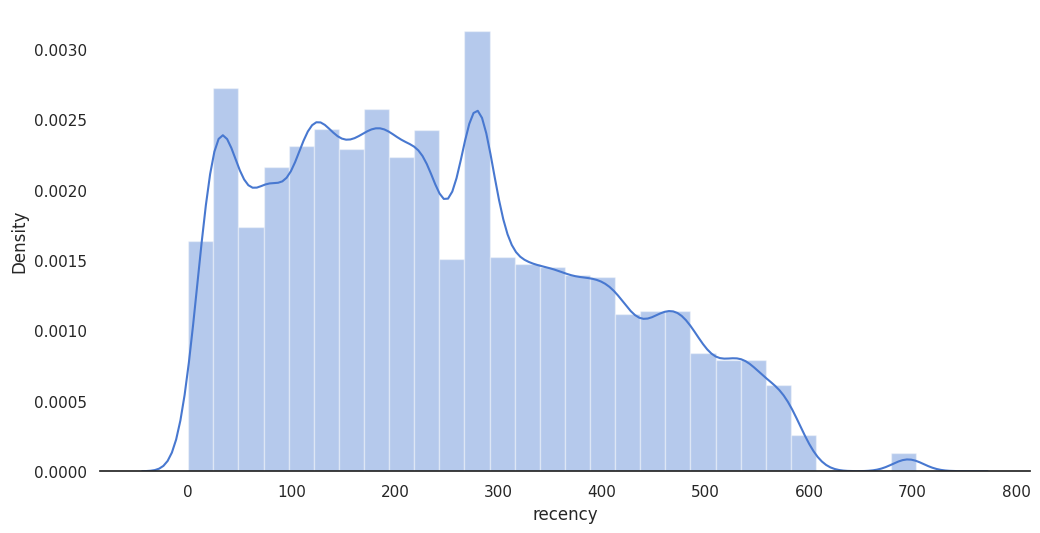

In [9]:
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(df_user['recency'], bins=30)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

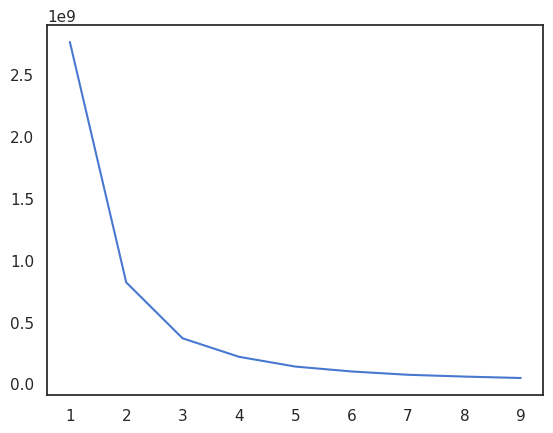

In [10]:
#kmeans 계산을 위한 elbow point 구하기
from sklearn.cluster import KMeans
point={}
df_recency = df_user[['recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_recency)
    df_recency['cluster'] = kmeans.labels_
    point[k] = kmeans.inertia_
plt.plot(list(point.keys()), list(point.values()))
plt.show()

In [11]:
# 군집수를 구하기 위해 elbow point를 활용하였고, 대략적으로 5정도가 적당한 것으로 보인다.

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['recency']])
df_user['recencycluster'] = kmeans.predict(df_user[['recency']])

#cluster 분석 모형
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final
df_user = order_cluster('recencycluster', 'recency',df_user,False)
df_user.groupby('recencycluster')['recency'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
recencycluster,,,,,,,,
0,15277.0,513.872030,50.734758,446.0,473.00,506.0,546.0,728.0
1,19753.0,378.319141,35.462953,320.0,348.00,377.0,409.0,445.0
2,28398.0,260.794105,31.485163,207.0,232.00,265.0,283.0,319.0
3,29926.0,153.628250,30.137642,103.0,126.25,153.0,180.0,206.0
4,24247.0,51.457294,26.816431,0.0,28.00,47.0,75.0,102.0


In [ ]:
#군집이 가면 갈수록 평균이 낮아지고, 최신성이 존재하는 것을 볼 수 있습니다.

<ipython-input-13-5a2c63ce8235>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_user['frequency'], hist=False)


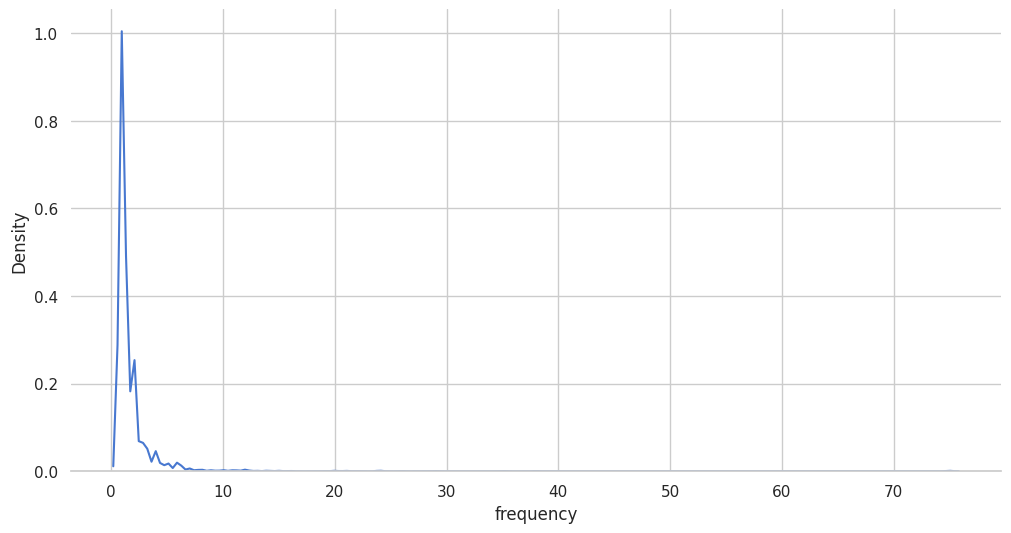

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-5a2c63ce8235>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-5a2c63ce8235>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

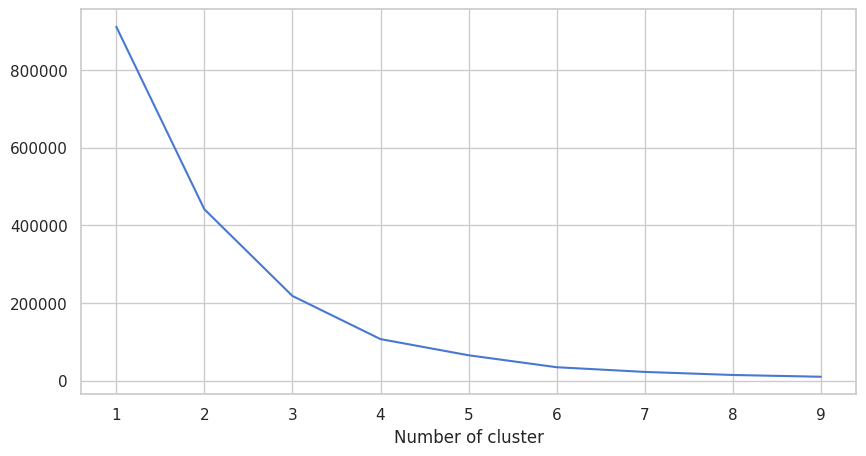

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
frequencycluster,,,,,,,,
0,102392.0,1.208063,0.405924,1.0,1.0,1.0,1.00,2.0
1,13212.0,4.046473,1.187050,3.0,3.0,4.0,5.00,7.0
2,1514.0,10.923382,2.377899,8.0,9.0,11.0,12.00,18.0
3,408.0,25.142157,5.946063,19.0,21.0,24.0,26.75,38.0
4,75.0,75.000000,0.000000,75.0,75.0,75.0,75.00,75.0


In [13]:
#Frequency 도출을 위한 데이터 추출
df_frequency = df.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_frequency.rename(columns = {'order_purchase_timestamp' : 'frequency'}, inplace = True)
df_user = pd.merge(df_user, df_frequency, on ='customer_unique_id')
df_user.frequency.describe()

# 분포 그래프
sns.set(palette='muted', color_codes=True, style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(df_user['frequency'], hist=False)
plt.show()

#kmeans 계산을 위한 elbow point 구하기 >>point={}
df_frequency = df_user[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_frequency)
    df_frequency["clusters"] = kmeans.labels_
    point[k] = kmeans.inertia_
plt.figure(figsize=(10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

#kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['frequency']])
df_user['frequencycluster'] = kmeans.predict(df_user[['frequency']])
df_user = order_cluster('frequencycluster','frequency',df_user,True)
df_user.groupby('frequencycluster')['frequency'].describe()

In [ ]:
# 군집그룹이 내려갈수록 평균이 점점 높아져서 구매횟수가 점점 높아지는 것을 볼 수 있습니다.

<ipython-input-14-0580c88842c8>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_user['payment_value'], hist=False)


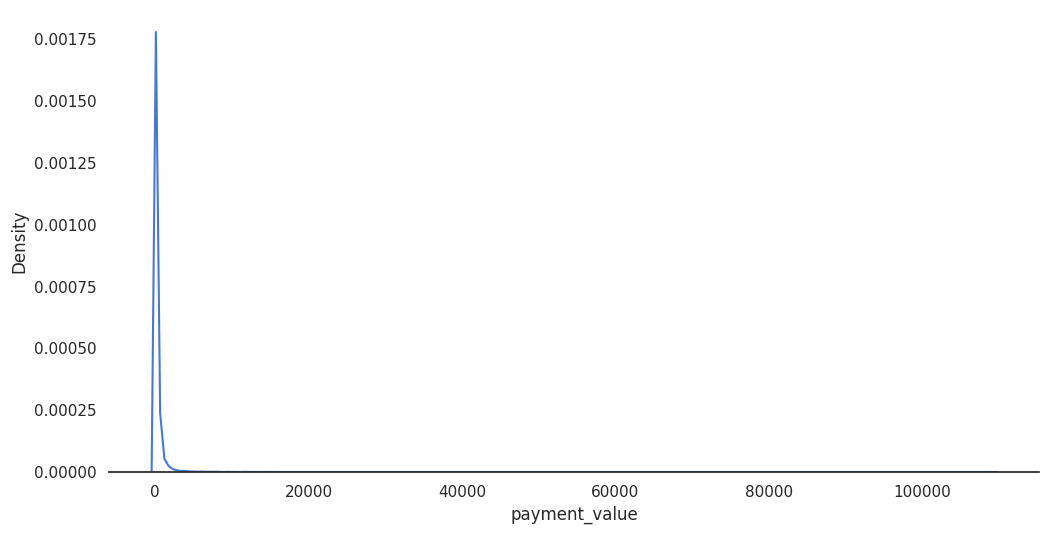

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-0580c88842c8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-0580c88842c8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

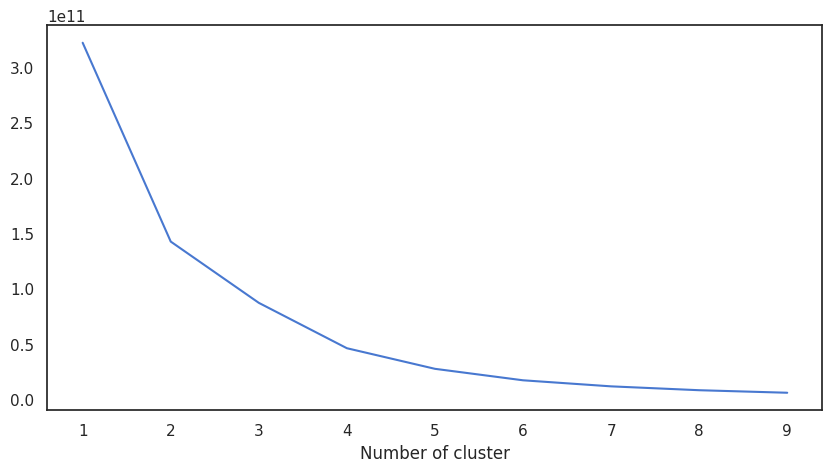

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,113180.0,213.812343,238.920642,9.59,68.44,127.54,248.04,1453.30
1,3857.0,2699.913511,1275.862248,1454.56,1760.75,2183.15,3266.46,7046.56
2,457.0,11537.199037,4142.820586,7148.88,7956.20,9773.81,14401.00,22346.60
3,99.0,35045.483939,8334.466439,25051.89,27935.46,30186.00,44048.00,45256.00
4,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [14]:
#Monetary 도출을 위한 데이터 추출
df_revenue = df.groupby('customer_unique_id').payment_value.sum().reset_index()
df_user = pd.merge(df_user, df_revenue, on ='customer_unique_id')

# 분포 그래프
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(df_user['payment_value'], hist=False)
plt.show()

#kmeans 계산을 위한 elbow point 구하기 >>point={}
df_revenue = df_user[['payment_value']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_revenue)
    df_revenue["clusters"] = kmeans.labels_
    point[k] = kmeans.inertia_
plt.figure(figsize=(10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

#kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['payment_value']])
df_user['RevenueCluster'] = kmeans.predict(df_user[['payment_value']])
df_user = order_cluster('RevenueCluster','payment_value',df_user,True)
df_user.groupby('RevenueCluster')['payment_value'].describe()

In [ ]:
# 그룹 4로 갈수록 구매금액이 많아지는 것으로 나타났다.
# 해당 그룹별 점수를 부여할 수 있고, RFM에 대한 기준을 정할 수 있습니다.

In [15]:
#RFM 수치를 바탕으로 고객 스코어링 작업
df_user.columns = ['customer_unique_id', 'recnecy','recencycluster', 'frequency','frequencycluster','revenue','revenuecluster']
df_user['overallscore'] = df_user['recencycluster'] + df_user['frequencycluster'] + df_user['revenuecluster']

In [16]:
#총 스코어링 점수는 11개 나옴
df_user.groupby('overallscore') ['recnecy','frequency','revenue'].mean()

<ipython-input-16-4b72ec06e639>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_user.groupby('overallscore') ['recnecy','frequency','revenue'].mean()


,recnecy,frequency,revenue
overallscore,,,
0,513.240825,1.208126,176.100488
1,389.194925,1.400218,211.290904
2,273.347079,1.492623,241.960841
3,169.972600,1.631457,268.165726
4,71.176659,1.732210,318.497220
5,100.151849,6.301157,1479.628253
6,98.593573,8.262760,4002.952250
7,125.713092,12.543175,10454.924568
8,83.693878,11.040816,20358.559796


In [17]:
#점수에 따라 low, mid, high 등급 나누기
df_user['segment'] = 'normal'
df_user.loc[df_user['overallscore']>3, 'segment'] = 'Gold'
df_user.loc[df_user['overallscore']>6, 'segment'] = 'VIP'

In [18]:
df_user

,customer_unique_id,recnecy,recencycluster,frequency,frequencycluster,revenue,revenuecluster,overallscore,segment
0,708ab75d2a007f0564aedd11139c7708,130,3,1,0,99.33,0,3,normal
1,6e3c218d5f0434ddc4af3d6a60767bbf,118,3,2,0,192.24,0,3,normal
2,6e3c218d5f0434ddc4af3d6a60767bbf,118,3,2,0,192.24,0,3,normal
3,0ae522661311f598df20272643d39ce6,164,3,1,0,157.45,0,3,normal
4,d386a136dc889cf681443061874caad8,117,3,1,0,136.71,0,3,normal
...,...,...,...,...,...,...,...,...,...
117596,0a0a92112bd4c708ca5fde585afaa872,338,1,8,2,109312.64,4,7,VIP
117597,0a0a92112bd4c708ca5fde585afaa872,338,1,8,2,109312.64,4,7,VIP
117598,0a0a92112bd4c708ca5fde585afaa872,338,1,8,2,109312.64,4,7,VIP
117599,0a0a92112bd4c708ca5fde585afaa872,338,1,8,2,109312.64,4,7,VIP
